# PART A
Steps and tasks: [ Total Score: 40 Marks]
## 1. Read and Analyse Dataset. [5 Marks]
### A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]

### ***** Due to size and memory error only a sample of 20000 records were picked for this project *****
Sample filter is done in Q1.B.ii

In [1]:
import pandas as pd
import numpy as np
from langdetect import detect
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score, average_precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import json
import random
from nltk.stem.porter import *

In [1]:
zip_path='blogs.zip'
with ZipFile(zip_path, 'r') as z:
  z.extractall()

In [2]:
blogtext_df = pd.read_csv("blogtext.csv")

In [3]:
blogtext_df.shape

(681284, 7)

In [4]:
blogtext_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [5]:
blogtext_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
blogtext_df.tail()

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [7]:
blogtext_df.sample(frac =.0001)

,id,gender,age,topic,sign,date,text
475746,2020102,female,16,Student,Virgo,"05,February,2004","'Unless we live what we know, we do not..."
511418,1894533,male,24,BusinessServices,Libra,"01,August,2004",urlLink CBC News: Tally of U.S. mi...
277665,3985351,female,35,Advertising,Aries,"05,August,2004",But only because I think urlLink P...
3017,589736,male,35,Technology,Aries,"05,August,2004",what the hell is guy fawkes day? ...
419494,3532367,male,33,Education,Aries,"01,July,2004",Just had news from Sandra about Rob. He...
...,...,...,...,...,...,...,...
387532,1774842,female,15,indUnk,Cancer,"23,July,2004",anyway--today i went to target and boug...
288559,3292690,female,15,indUnk,Gemini,"19,June,2004",will not (haha i almost forgot wh...
425093,801102,female,23,Advertising,Aquarius,"16,December,2003","Stop crying, Mom."
301368,831233,male,16,indUnk,Taurus,"28,August,2002","aaah, that's scary the frames..."


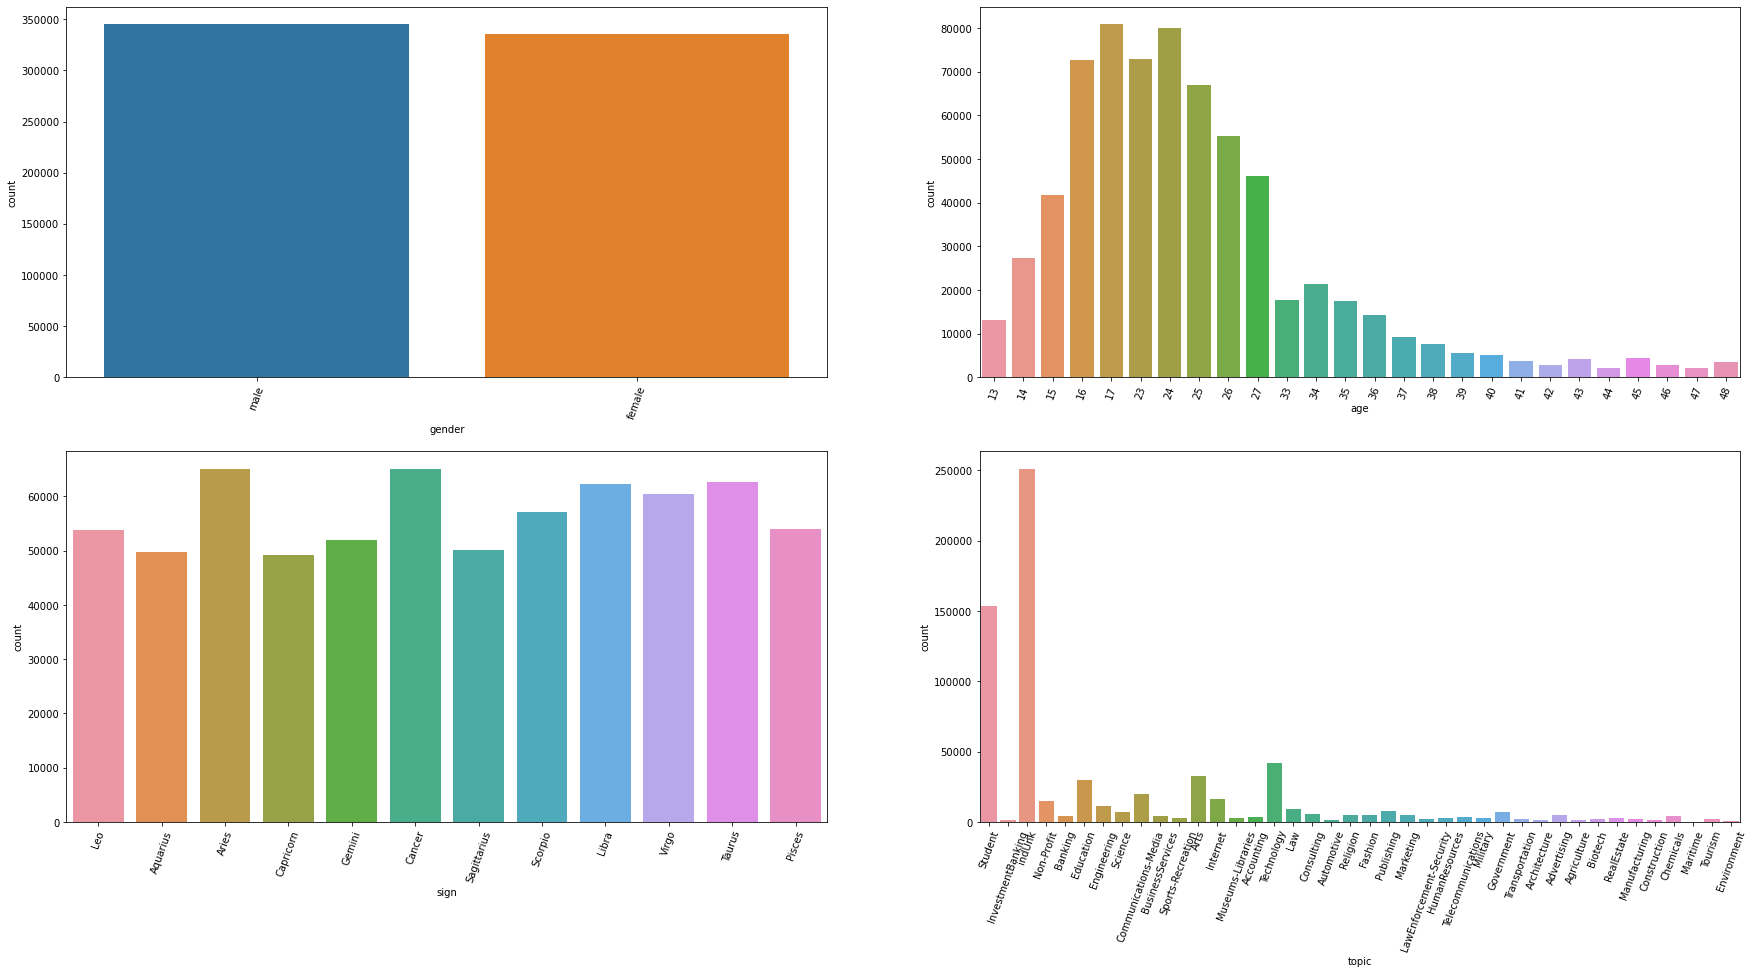

In [8]:
## Showing count plots for various attributes in the dataframe
plt.figure(figsize=(30,15))
cols=["gender","age","sign", "topic"]
index = 1
for col in cols:
    plt.subplot(2,2,index)
    sns.countplot(x=col,data=blogtext_df)
    plt.xticks(rotation=70)
    index+= 1

In [9]:
cnts=blogtext_df['topic'].value_counts()
cnts_df = pd.DataFrame(cnts)
cnts_df = cnts_df.reset_index()
cnts_df.columns = ['topic', 'topic_cnt']
df_len=len(blogtext_df['topic'])
cnts_df['perc']=(cnts_df['topic_cnt']/df_len)*100
cnts_df.columns = ['topic', 'topic_cnt', 'topic_perc']
cnts_df.head(50)

,topic,topic_cnt,topic_perc
0,indUnk,251015,36.844400
1,Student,153903,22.590139
2,Technology,42055,6.172903
3,Arts,32449,4.762918
4,Education,29633,4.349581
5,Communications-Media,20140,2.956183
6,Internet,16006,2.349387
7,Non-Profit,14700,2.157690
8,Engineering,11653,1.710447
9,Law,9040,1.326906


##### Insights on Data Analysis:
- From the plots above, the data is equally distributed between male and female genders
- Most of the population is young and between 16 to 27 years of age.
- The distribution of population is almost same across zodiac signs. 
- 'IndUnk' topic has the highest count and covers 36.8% of the entire population. 'Student' topic has the second highest count and covers 22.6% of teh population. Most of the other topics have less than 50000 count and covers as low as < 1%. Predicting the correct topic may be challenge becuase of such unequal distribution of data.

### B. Clean the Structured Data [3 Marks]
#### i. Missing value analysis and imputation. [1 Marks]

In [10]:
### Let us get the null counts in all fields
for x in blogtext_df.columns:
    print("Column name :{}, Number of null values :{}".format(x,blogtext_df[x].isnull().sum()))

Column name :id, Number of null values :0
Column name :gender, Number of null values :0
Column name :age, Number of null values :0
Column name :topic, Number of null values :0
Column name :sign, Number of null values :0
Column name :date, Number of null values :0
Column name :text, Number of null values :0


##### There are no null values in any of the columns. There is nothing to impute for nulls.

#### ii. Eliminate Non-English textual data. [2 Marks]
Hint: Refer ‘langdetect’ library to detect language of the input text

In [11]:
# Due to memory errors taking only 20000 records
blog_samp=blogtext_df.sample(n=20000)
blog_samp.reset_index(inplace=True)

In [12]:
# Function to detect language and return True if language is True
def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [13]:
# Applying the language detection function
blog_df = blog_samp[blog_samp['text'].apply(detect_en)]
blog_df.shape

(19145, 8)

#### After eliminating non-english textual data we have got 19117 records.

## 2. Preprocess unstructured data to make it consumable for model training. [5 Marks]
### A. Eliminate All special Characters and Numbers [2 Marks]

In [14]:
# Selecting only alphabets and in between spaces to identify words
blog_df.text = blog_df.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

In [15]:
blog_df.head(5)

,index,id,gender,age,topic,sign,date,text
0,57900,1685295,female,17,Student,Capricorn,"10,August,2003",Well then I see that Deadinside posted He rea...
1,519451,3497848,female,17,indUnk,Aquarius,"31,May,2004",This relationship is the most useless I ve ev...
2,82627,4230427,female,16,indUnk,Pisces,"22,August,2004",Since I m watching The Days and there s a com...
3,460197,1476382,male,33,Publishing,Gemini,"26,November,2003",Madonna Loses Her Accent It s official Madonn...
4,671478,4255604,male,14,Student,Leo,"25,May,2004",First of all before the attitude problemo lem...


In [16]:
# sample text from blog_df 
for i in range(3):
    print(blog_df.text[i])

 Well then I see that Deadinside posted He really isn t crazy I swear and yes punk rock rules I wanted to post some pictures from my starcraft game but they all came out dark and ugly It was the best game ever The General and me versus I think four comps on a money map I know that it doesn t sound great After about two minutes the General made a retreat into my base and following him was a mass of AI After almost dying three times he came back with Mutalisks for those unfamiliar with Starcraft mutalisks are gross flying units By this time though I had secured my base with lurkers hidden units that do mass damage and had already killed two comps with hyralisks ground range units Great Game It wasn t great because we won well maybe it was but more so because these comps were actually kinda almost good If you want to download the relplay go ahead and do so urlLink here Be warned you need Starcraft to view it 
 This relationship is the most useless I ve ever been apart of No matter how har

### B. Lowercase all textual data [1 Marks]

In [17]:
# Converting all text to lower case
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [18]:
blog_df.head(5)

,index,id,gender,age,topic,sign,date,text
0,57900,1685295,female,17,Student,Capricorn,"10,August,2003",well then i see that deadinside posted he rea...
1,519451,3497848,female,17,indUnk,Aquarius,"31,May,2004",this relationship is the most useless i ve ev...
2,82627,4230427,female,16,indUnk,Pisces,"22,August,2004",since i m watching the days and there s a com...
3,460197,1476382,male,33,Publishing,Gemini,"26,November,2003",madonna loses her accent it s official madonn...
4,671478,4255604,male,14,Student,Leo,"25,May,2004",first of all before the attitude problemo lem...


In [19]:
# sample text from blog_df 
for i in range(3):
    print(blog_df.text[i])

 well then i see that deadinside posted he really isn t crazy i swear and yes punk rock rules i wanted to post some pictures from my starcraft game but they all came out dark and ugly it was the best game ever the general and me versus i think four comps on a money map i know that it doesn t sound great after about two minutes the general made a retreat into my base and following him was a mass of ai after almost dying three times he came back with mutalisks for those unfamiliar with starcraft mutalisks are gross flying units by this time though i had secured my base with lurkers hidden units that do mass damage and had already killed two comps with hyralisks ground range units great game it wasn t great because we won well maybe it was but more so because these comps were actually kinda almost good if you want to download the relplay go ahead and do so urllink here be warned you need starcraft to view it 
 this relationship is the most useless i ve ever been apart of no matter how har

### C. Remove all Stopwords [1 Marks]


In [20]:
stopwords=set(stopwords.words('english'))

In [21]:
# Removing stopwords
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [22]:
blog_df.head(5)

,index,id,gender,age,topic,sign,date,text
0,57900,1685295,female,17,Student,Capricorn,"10,August,2003",well see deadinside posted really crazy swear ...
1,519451,3497848,female,17,indUnk,Aquarius,"31,May,2004",relationship useless ever apart matter hard tr...
2,82627,4230427,female,16,indUnk,Pisces,"22,August,2004",since watching days commercial post something ...
3,460197,1476382,male,33,Publishing,Gemini,"26,November,2003",madonna loses accent official madonna lost fau...
4,671478,4255604,male,14,Student,Leo,"25,May,2004",first attitude problemo lemme point fact exun ...


In [23]:
# sample text from blog_df 
for i in range(3):
    print(blog_df.text[i])

well see deadinside posted really crazy swear yes punk rock rules wanted post pictures starcraft game came dark ugly best game ever general versus think four comps money map know sound great two minutes general made retreat base following mass ai almost dying three times came back mutalisks unfamiliar starcraft mutalisks gross flying units time though secured base lurkers hidden units mass damage already killed two comps hyralisks ground range units great game great well maybe comps actually kinda almost good want download relplay go ahead urllink warned need starcraft view
relationship useless ever apart matter hard try well think always point relationship never able move past grow think secretly hate one another yes hate yet find needing reason would think support comfort even something make laugh surely laughing matter need get life ironic one aspect life need right excel life aspect must say goodbye need would fair end relationship soon possible one us gets hurt namely read another

### D. Remove all extra white spaces [1 Marks]

In [24]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [25]:
blog_df.head(5)

,index,id,gender,age,topic,sign,date,text
0,57900,1685295,female,17,Student,Capricorn,"10,August,2003",well see deadinside posted really crazy swear ...
1,519451,3497848,female,17,indUnk,Aquarius,"31,May,2004",relationship useless ever apart matter hard tr...
2,82627,4230427,female,16,indUnk,Pisces,"22,August,2004",since watching days commercial post something ...
3,460197,1476382,male,33,Publishing,Gemini,"26,November,2003",madonna loses accent official madonna lost fau...
4,671478,4255604,male,14,Student,Leo,"25,May,2004",first attitude problemo lemme point fact exun ...


In [26]:
# sample text from blog_df 
for i in range(3):
    print(blog_df.text[i])

well see deadinside posted really crazy swear yes punk rock rules wanted post pictures starcraft game came dark ugly best game ever general versus think four comps money map know sound great two minutes general made retreat base following mass ai almost dying three times came back mutalisks unfamiliar starcraft mutalisks gross flying units time though secured base lurkers hidden units mass damage already killed two comps hyralisks ground range units great game great well maybe comps actually kinda almost good want download relplay go ahead urllink warned need starcraft view
relationship useless ever apart matter hard try well think always point relationship never able move past grow think secretly hate one another yes hate yet find needing reason would think support comfort even something make laugh surely laughing matter need get life ironic one aspect life need right excel life aspect must say goodbye need would fair end relationship soon possible one us gets hurt namely read another

## 3. Build a base Classification model [8 Marks]
### A. Create dependent and independent variables [2 Marks]
Hint: Treat ‘topic’ as a Target variable.

In [27]:
X=blog_df.text.values
y=blog_df.topic.values

In [28]:
X

array(['well see deadinside posted really crazy swear yes punk rock rules wanted post pictures starcraft game came dark ugly best game ever general versus think four comps money map know sound great two minutes general made retreat base following mass ai almost dying three times came back mutalisks unfamiliar starcraft mutalisks gross flying units time though secured base lurkers hidden units mass damage already killed two comps hyralisks ground range units great game great well maybe comps actually kinda almost good want download relplay go ahead urllink warned need starcraft view',
       'relationship useless ever apart matter hard try well think always point relationship never able move past grow think secretly hate one another yes hate yet find needing reason would think support comfort even something make laugh surely laughing matter need get life ironic one aspect life need right excel life aspect must say goodbye need would fair end relationship soon possible one us gets hurt n

In [29]:
y

array(['Student', 'indUnk', 'indUnk', ..., 'indUnk', 'indUnk', 'Student'],
      dtype=object)

In [30]:
# Label encoding for y
enc_labels = preprocessing.LabelEncoder()
y_en = enc_labels.fit_transform(y)
print(enc_labels.classes_)

['Accounting' 'Advertising' 'Agriculture' 'Architecture' 'Arts'
 'Automotive' 'Banking' 'Biotech' 'BusinessServices' 'Chemicals'
 'Communications-Media' 'Construction' 'Consulting' 'Education'
 'Engineering' 'Environment' 'Fashion' 'Government' 'HumanResources'
 'Internet' 'InvestmentBanking' 'Law' 'LawEnforcement-Security'
 'Manufacturing' 'Maritime' 'Marketing' 'Military' 'Museums-Libraries'
 'Non-Profit' 'Publishing' 'RealEstate' 'Religion' 'Science'
 'Sports-Recreation' 'Student' 'Technology' 'Telecommunications' 'Tourism'
 'Transportation' 'indUnk']


In [31]:
y_en

array([34, 39, 39, ..., 39, 39, 34])

In [32]:
print("Shape of X    : {}".format(X.shape))
print("Shape of y_en : {}".format(y_en.shape))

Shape of X    : (19145,)
Shape of y_en : (19145,)


### B. Split data into train and test. [1 Marks]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y_en, random_state=5,test_size = 0.2)

In [34]:
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of X_test  : {}".format(X_test.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of y_test  : {}".format(y_test.shape))

Shape of X_train : (15316,)
Shape of X_test  : (3829,)
Shape of y_train : (15316,)
Shape of y_test  : (3829,)


In [35]:
X_train

array(['white castle good deed influx nerds hello folks hope grace eyes computer screen see blog get immediately horny give brotha offer good sexual act broke idea getting paid question yesterday good day left job little bit late threw wrench plans like go home visit parents mess little funny thing called moms writing hospital day fucked case acid reflux shit runs family worst thing world rather heart attack several times buttplug used revival kit ok though mother weird relationship getting closer years young hating lady pops pops never says anything cool though would give kidney back yesterday went white castle addicted waiting motherfuckers another whitie eating contest would win shit hands would predict two mins dares challenge brought remembered shappy diary loves whities shappy point ask family given reason hate good deed year brought white castles gift fellow white castle impressario seemed pretty happy hope enjoyed put bar moonshine looking like ok shappy could enjoy moonshine d

In [36]:
X_test

array(['finding nemo watched th june regal cinemas welcome walt disney world world soul spirit exist human bodies creature imagine toys fish lot teach us business living love friendship find lot adults kids watching enjoying may even learning movie welcome walt disney world finding nemo takes journey deep currents ocean deep insecurities protective father coming age adventurous son undying spirit escape freedom along sharky message fish friends food animation movie pixar animation studios absolute treat watch depths colors ocean colors corals reefs take world dream ocean movie funny kids way funny cos lot giggles adolescents adults laugh louder time came hall would keep hearing awesome movie quite long time awe relatively simple story clown fish father funny marlon whose son nemo small fin marlon concerned safety son ocean safe place reluctant send even school ocean school first day school nemo eager prove dad take care goes extra league captured diver ends dentist aquarium find route 

In [37]:
y_train

array([ 4,  1, 35, ..., 34, 39,  4])

In [38]:
y_test

array([14, 35, 34, ..., 39, 39, 39])

### C. Vectorize data using any one vectorizer. [2 Marks]

In [39]:
# Let us use Count vectorizer
cnt_vect = CountVectorizer(ngram_range=(1,2))

In [40]:
#Feed train data to CountVectorizer
cnt_vect.fit(X_train)

CountVectorizer(ngram_range=(1, 2))

In [41]:
#Check the vocablury size
len(cnt_vect.vocabulary_)

1148683

In [42]:
#Get feature names
cnt_vect.get_feature_names()

['aa',
 'aa ammm',
 'aa asked',
 'aa batteries',
 'aa bdaee',
 'aa browsing',
 'aa example',
 'aa html',
 'aa nbsp',
 'aa operates',
 'aa subscription',
 'aaa',
 'aaa affiliate',
 'aaa bar',
 'aaa card',
 'aaa come',
 'aaa damn',
 'aaa grabbed',
 'aaa love',
 'aaa rated',
 'aaa say',
 'aaaa',
 'aaaa earth',
 'aaaa laughed',
 'aaaaa',
 'aaaaa im',
 'aaaaaaa',
 'aaaaaaa know',
 'aaaaaaaaaaa',
 'aaaaaaaaaaa thats',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaa im',
 'aaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaa see',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh want',
 'aaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaah love',
 'aaaaaaaaaaaaaaaaaaaahhhhhh',
 'aaaaaaaaaaaaaaaaaaaahhhhhh ano',
 'aaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhh urllink',
 'aaaaaaaaaaaaahhh',
 'aaaaaaaaaaaaahhh cant',
 'aaaaaaaaaaaaahhhhhhhhhh',
 'aaaaaaaaaaaaahhhhhhhhhh hahahahahahahaha',
 'aaaaaaaaaaaamazing',
 'aaaaaaaaaaaamazing hol

In [43]:
# Transforming X_train
X_train_ct = cnt_vect.transform(X_train)

In [44]:
X_train_ct

<15316x1148683 sparse matrix of type '<class 'numpy.int64'>'
	with 2720502 stored elements in Compressed Sparse Row format>

In [45]:
# Transforming X_test
X_test_ct = cnt_vect.transform(X_test)

In [46]:
X_test_ct

<3829x1148683 sparse matrix of type '<class 'numpy.int64'>'
	with 435727 stored elements in Compressed Sparse Row format>

In [47]:
print(X_train_ct)

  (0, 5085)	1
  (0, 5087)	1
  (0, 5439)	1
  (0, 5471)	1
  (0, 6119)	1
  (0, 6150)	1
  (0, 9860)	1
  (0, 9920)	1
  (0, 28943)	1
  (0, 29328)	1
  (0, 37281)	1
  (0, 38389)	1
  (0, 41071)	1
  (0, 41225)	1
  (0, 50696)	1
  (0, 51937)	1
  (0, 53053)	1
  (0, 53154)	1
  (0, 55062)	1
  (0, 55227)	1
  (0, 60320)	1
  (0, 60477)	1
  (0, 65640)	1
  (0, 66760)	1
  (0, 69173)	1
  :	:
  (15315, 1071713)	1
  (15315, 1071714)	1
  (15315, 1080168)	1
  (15315, 1080642)	1
  (15315, 1084132)	1
  (15315, 1085397)	1
  (15315, 1095443)	1
  (15315, 1095451)	1
  (15315, 1099897)	1
  (15315, 1100016)	1
  (15315, 1103634)	1
  (15315, 1104027)	1
  (15315, 1120414)	1
  (15315, 1120416)	1
  (15315, 1125586)	2
  (15315, 1125818)	1
  (15315, 1126828)	1
  (15315, 1128860)	1
  (15315, 1129064)	1
  (15315, 1132024)	1
  (15315, 1132297)	1
  (15315, 1139422)	1
  (15315, 1139608)	1
  (15315, 1143951)	1
  (15315, 1144001)	1


In [48]:
print(X_test_ct)

  (0, 1936)	1
  (0, 3980)	1
  (0, 10295)	1
  (0, 11720)	1
  (0, 12306)	2
  (0, 12338)	1
  (0, 12799)	1
  (0, 15311)	1
  (0, 18504)	1
  (0, 24542)	1
  (0, 28943)	1
  (0, 30047)	1
  (0, 32486)	1
  (0, 35818)	2
  (0, 47683)	4
  (0, 66824)	1
  (0, 66855)	1
  (0, 66880)	1
  (0, 67117)	1
  (0, 69173)	1
  (0, 69886)	1
  (0, 86273)	1
  (0, 107722)	1
  (0, 108138)	1
  (0, 118235)	1
  :	:
  (3828, 63921)	1
  (3828, 124460)	2
  (3828, 158595)	1
  (3828, 158991)	1
  (3828, 219784)	1
  (3828, 316676)	1
  (3828, 316696)	1
  (3828, 342455)	2
  (3828, 431345)	1
  (3828, 436128)	1
  (3828, 491731)	1
  (3828, 596958)	2
  (3828, 597540)	1
  (3828, 675505)	1
  (3828, 675985)	1
  (3828, 706241)	1
  (3828, 739696)	1
  (3828, 805254)	1
  (3828, 806317)	1
  (3828, 823992)	1
  (3828, 999919)	1
  (3828, 1004190)	1
  (3828, 1018298)	1
  (3828, 1020203)	1
  (3828, 1025680)	1


### D. Build a base model for Supervised Learning - Classification. [2 Marks]

In [49]:
# Building a logistic regression model as base model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver='lbfgs',max_iter=100)
logit_model = OneVsRestClassifier(logit_model)

In [50]:
logit_model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [51]:
y_pred_labels = logit_model.predict(X_test_ct)
y_pred_scores = logit_model.decision_function(X_test_ct)

In [52]:
y_pred_scores

array([[-14.16618651, -11.4257315 , -17.08211517, ..., -10.25428723,
        -10.7580706 ,  -3.28350025],
       [ -7.62001379,  -9.33698858,  -7.8008289 , ...,  -8.54401348,
         -7.61670433,  -3.59833486],
       [ -8.56504739,  -7.25379481,  -7.31065354, ...,  -8.58076242,
         -8.41643149,  -2.00670953],
       ...,
       [ -6.597148  ,  -6.16045806,  -7.44548841, ...,  -6.56342654,
         -6.9655047 ,  -1.93386399],
       [ -8.93167774,  -9.1480933 ,  -8.08146157, ..., -10.23695308,
         -7.25212528,  -0.87745178],
       [ -5.76347637,  -5.95007717,  -7.54903348, ...,  -7.0378246 ,
         -5.75392233,   0.08166116]])

In [53]:
y_pred_labels

array([34, 34, 34, ..., 35, 39, 39])

### E. Clearly print Performance Metrics. [1 Marks]
Hint: Accuracy, Precision, Recall, ROC-AUC

In [59]:
# Just a quick print on accuracy scores...  Note:Detailed evaluation metrics are given later in this section.
print('Accuracy on Training data using logistic regression model is {}'.format(logit_model.score(X_train_ct, y_train)))
print('Accuracy on Test data using logistic regression model is {}'.format(logit_model.score(X_test_ct, y_test)))

Accuracy on Training data using logistic regression model is 0.9887046226168712
Accuracy on Test data using logistic regression model is 0.37346565682945937


In [60]:
y_pred_inversed = enc_labels.inverse_transform(y_pred_labels)
y_test_inversed = enc_labels.inverse_transform(y_test)

In [61]:
## Sample records and respective predictions
for i in range(5):
    print("i                     : {}".format(i))
    print("Text                  : {}".format(X_test[i]))
    print("Actual Topic assigned : {}".format(y_test_inversed[i]))
    print("Predicted Topic       : {}".format(y_pred_inversed[i]))
    print("y_test label          : {}".format(y_test[i]))
    print("y_pred_labels         : {}".format(y_pred_labels[i]))
    print("---------------------------------------------------")

i                     : 0
Text                  : finding nemo watched th june regal cinemas welcome walt disney world world soul spirit exist human bodies creature imagine toys fish lot teach us business living love friendship find lot adults kids watching enjoying may even learning movie welcome walt disney world finding nemo takes journey deep currents ocean deep insecurities protective father coming age adventurous son undying spirit escape freedom along sharky message fish friends food animation movie pixar animation studios absolute treat watch depths colors ocean colors corals reefs take world dream ocean movie funny kids way funny cos lot giggles adolescents adults laugh louder time came hall would keep hearing awesome movie quite long time awe relatively simple story clown fish father funny marlon whose son nemo small fin marlon concerned safety son ocean safe place reluctant send even school ocean school first day school nemo eager prove dad take care goes extra league captur

<AxesSubplot:>

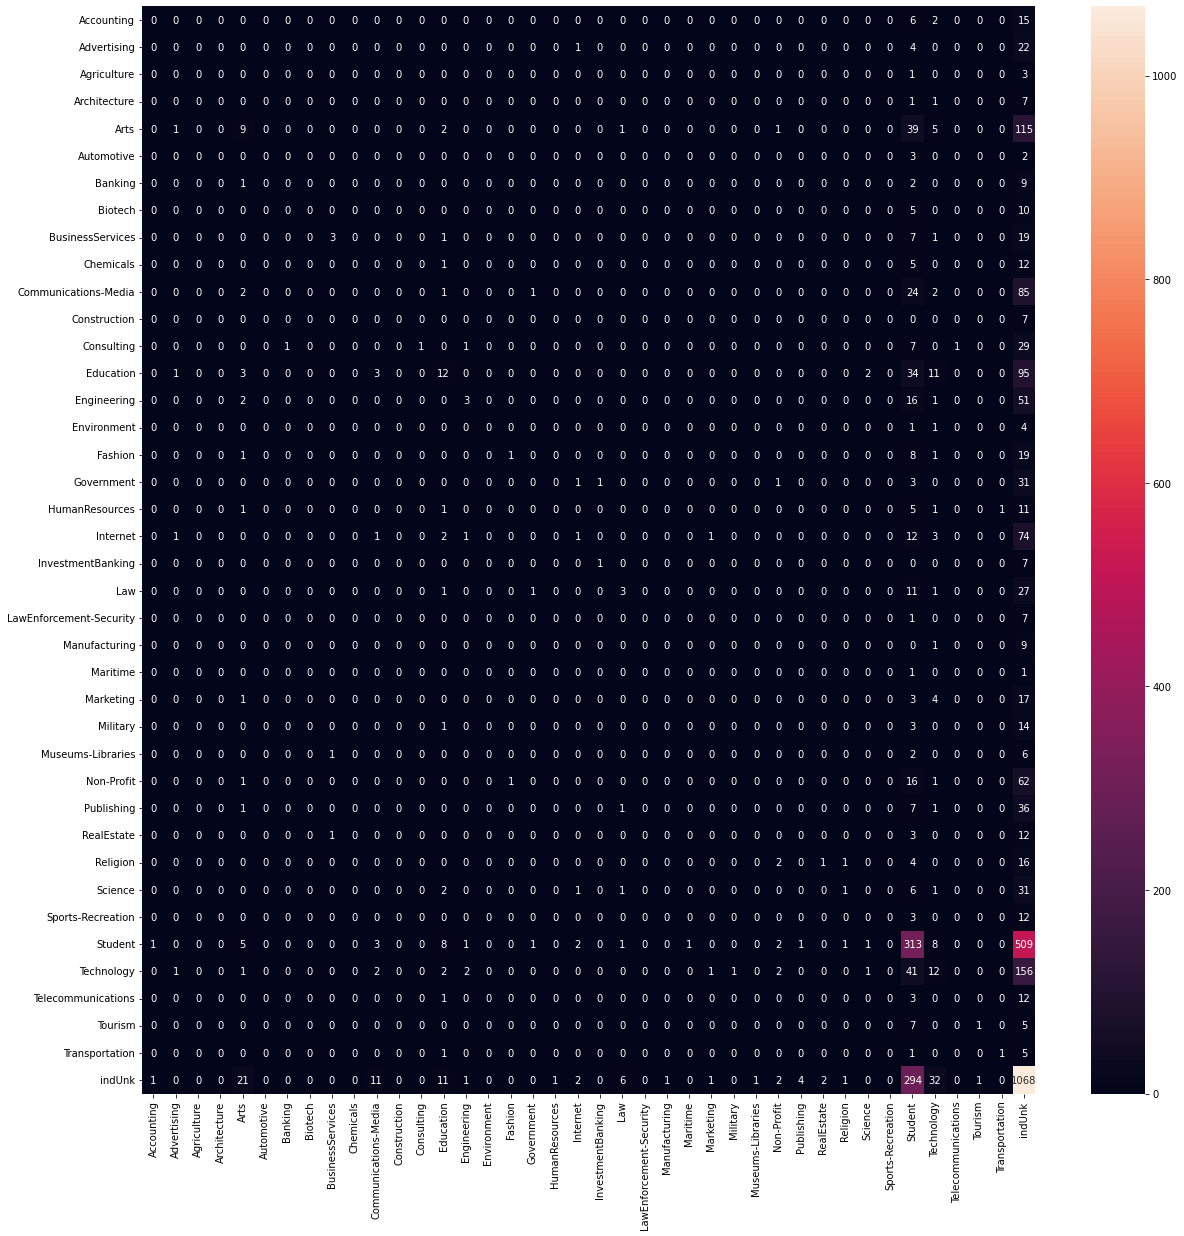

In [62]:
# Printing confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred_labels, labels=list(range(40)))

df_cm = pd.DataFrame(cm, index = [i for i in enc_labels.classes_], columns = [i for i in enc_labels.classes_])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True,fmt='g')

In [63]:
print("classification  Metrics for test dataset:\n",classification_report(y_test,y_pred_labels))

classification  Metrics for test dataset:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       0.18      0.05      0.08       173
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        15
           8       0.60      0.10      0.17        31
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00       115
          11       0.00      0.00      0.00         7
          12       1.00      0.03      0.05        40
          13       0.26      0.07      0.12       161
          14       0.33      0.04      0.07        73
          15       0.00      0.00      0.00         6
          16       0.50      0.03     

In [64]:
def print_evaluation_metrics(y_test, y_pred,avg_type):
    print("Accuracy score          - {} : {}".format(avg_type,accuracy_score(y_test, y_pred)))
    print("F1 score                - {} : {}".format(avg_type,f1_score(y_test, y_pred, average=avg_type)))
    print("Average precision score - {} : {}".format(avg_type,average_precision_score(y_test, y_pred, average=avg_type)))
    print("Average recall score    - {} : {}".format(avg_type,recall_score(y_test, y_pred, average=avg_type)))

In [65]:
n_classes = len(np.unique(y_test))
y_test_ = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_ = label_binarize(y_pred_labels, classes=np.arange(n_classes))
print_evaluation_metrics(y_test_,y_pred_,'micro')

Accuracy score          - micro : 0.37346565682945937
F1 score                - micro : 0.37346565682945937
Average precision score - micro : 0.15513995541032302
Average recall score    - micro : 0.37346565682945937


In [66]:
print_evaluation_metrics(y_test_,y_pred_,'macro')

Accuracy score          - macro : 0.37346565682945937
F1 score                - macro : 0.05578277277879114
Average precision score - macro : 0.03474709843181801
Average recall score    - macro : 0.047995275190726605


In [67]:
print_evaluation_metrics(y_test_,y_pred_,'weighted')

Accuracy score          - weighted : 0.37346565682945937
F1 score                - weighted : 0.2989717104801791
Average precision score - weighted : 0.22619204077002147
Average recall score    - weighted : 0.37346565682945937


#### Insights of evaluation metrics:
**Precision**                      : Out of all predicted values, what fraction are predicted correctly.
<br>**Recall(sensitivity or TPR)** : Out of all actual values how much fraction we identified correctly.
<br>**Micro-averaged F1 score**    : Computed as global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP).
<br>**Macro-averaged F1 score**    : Computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.
<br>**Weighted-averaged F1 score** : Calculated by taking the mean of all per-class F1 scores while considering each class’s support/weightage.

Since the distribution of data across Topics is not consistent/equal, and considering the weighted average F1 score will be appropriate.  Macro-averaging score will not help here as well as it does not consider the support each class provides for the model. In this multi-class classification problem, each class depending on its population/weightage contributes to model accuracy score.
- Weighted Average F1 score is 29.89% where as the overall Average score is 37.34%. Since the population taken for this model is small and the distribution is not equal for all topics, the model has over-fitted in training dataset and has very less accuracy score in test dataset.
- Overall Accuracy score for training dataset is 98.87% where as the model has accuracy score of 37.34% in test dataset.

In [70]:
# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
  
  n_classes = len(np.unique(y_test))
  y_test = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  threshold =dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], thresh = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Aggregating all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Interpolating all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Calculating average and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(figsize=(10,5))

  lw = 2
  plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

  plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=2,)


  for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol=1)


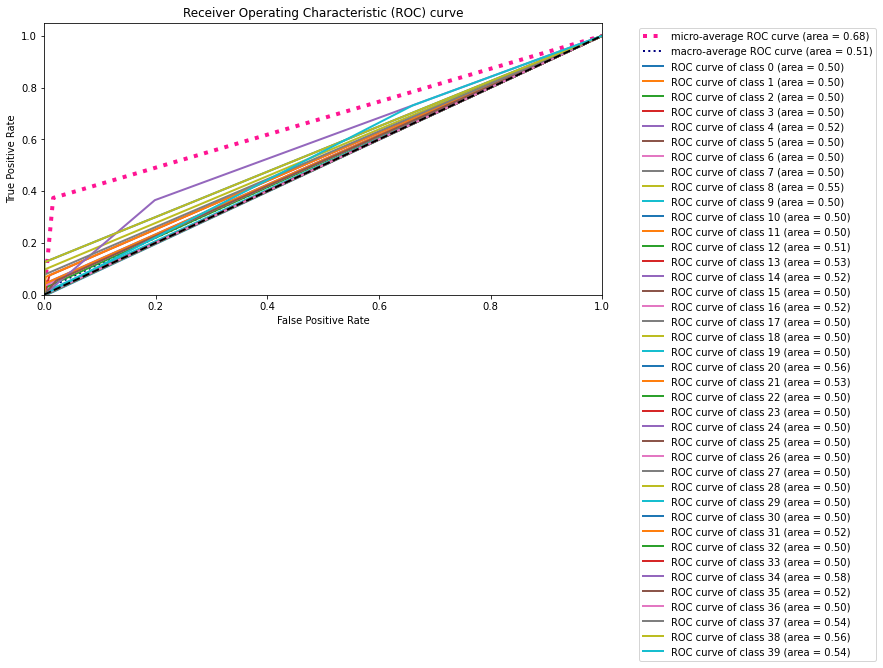

In [71]:
# Calling the function to plot the ROC curve
plot_roc_curve(y_test, y_pred_labels)

## 4. Improve Performance of model. [14 Marks]
### A. Experiment with other vectorisers. [4 Marks]

In [72]:
# Tokenize the text
blog_df['text_words'] = blog_df['text'].apply(lambda x : nltk.word_tokenize(x))
blog_df.head()

,index,id,gender,age,topic,sign,date,text,text_words
0,57900,1685295,female,17,Student,Capricorn,"10,August,2003",well see deadinside posted really crazy swear ...,"[well, see, deadinside, posted, really, crazy,..."
1,519451,3497848,female,17,indUnk,Aquarius,"31,May,2004",relationship useless ever apart matter hard tr...,"[relationship, useless, ever, apart, matter, h..."
2,82627,4230427,female,16,indUnk,Pisces,"22,August,2004",since watching days commercial post something ...,"[since, watching, days, commercial, post, some..."
3,460197,1476382,male,33,Publishing,Gemini,"26,November,2003",madonna loses accent official madonna lost fau...,"[madonna, loses, accent, official, madonna, lo..."
4,671478,4255604,male,14,Student,Leo,"25,May,2004",first attitude problemo lemme point fact exun ...,"[first, attitude, problemo, lem, me, point, fa..."


In [73]:
# Lets now use TF IDF vectorizer. Since we have huge texts, identifying important words can imporve the model prediction
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(analyzer='word',
                        tokenizer=dummy_fun,
                        preprocessor=dummy_fun,
                        token_pattern=None,
                        stop_words = 'english') 

In [74]:
tfidf_method = tfidf.fit_transform(blog_df.text_words)
tfidf_method.shape

(19145, 84008)

In [75]:
tfidf_method

<19145x84008 sparse matrix of type '<class 'numpy.float64'>'
	with 1321796 stored elements in Compressed Sparse Row format>

In [76]:
tfidf.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaahhhhhh',
 'aaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaahhh',
 'aaaaaaaaaaaaahhhhhhhhhh',
 'aaaaaaaaaaaamazing',
 'aaaaaaaaaaah',
 'aaaaaaaaaaand',
 'aaaaaaaaaahhhhh',
 'aaaaaaaaaarrrrrrrrrrrrgggh',
 'aaaaaaaaarrrrrrrggggggggghhhhhhhhhhhh',
 'aaaaaaaaggggggghhhhhhh',
 'aaaaaaaah',
 'aaaaaaaarrrrrrrrrrrrgggggggggggggghhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaarrrrrrrrrrrrrgggggggggggghhhhhhhhhhhh',
 'aaaaaaaawwwwwww',
 'aaaaaaacccccccccccccccccckkkkkkkkkkkkkkkkk',
 'aaaaaaagggghhhh',
 'aaaaaaah',
 'aaaaaaand',
 'aaaaaaarrrrrgggggghhhhh',
 'aaaaaack',
 'aaaaaages',
 'aaaaaah',
 'aaaaaahahahahhahaha',
 'aaaaaahhhhh',
 'aaaaaahhhhhhh',
 'aaaaaand',
 'aaaaah',
 'aaaaahhh',
 'aaaaahhhhhhhhhhhhhh',
 'aaaaall',
 'aaaaand',
 'aaaaanyways',
 'aaaaggh',
 'aaaagh',
 'aaaah',
 'aaaa

### B. Build classifier Models using other algorithms than base model. [4 Marks]

In [77]:
# Create Data Frame of tdidf scores
tfidf_df_method = pd.DataFrame(tfidf_method.toarray(),
             columns = tfidf.get_feature_names(),
             index = blog_df.index)

In [78]:
tfidf_df_method

,aa,aaa,aaaa,aaaaa,aaaaaaa,aaaaaaaaaa,aaaaaaaaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh,...,zzzzzzzz,zzzzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Calculate tfidf and list top 10
tfidf_df_method.mean().sort_values(ascending = False).head(10)  

urllink    0.033696
nbsp       0.026591
like       0.022715
know       0.017964
really     0.016795
time       0.016481
think      0.015380
good       0.014584
got        0.014406
people     0.014312
dtype: float64

In [80]:
def sentence(text):
    sent = ' '.join(text)
    return sent

In [81]:
blog_df['text_sntc'] = blog_df['text_words'].apply(sentence)
blog_df.head()

,index,id,gender,age,topic,sign,date,text,text_words,text_sntc
0,57900,1685295,female,17,Student,Capricorn,"10,August,2003",well see deadinside posted really crazy swear ...,"[well, see, deadinside, posted, really, crazy,...",well see deadinside posted really crazy swear ...
1,519451,3497848,female,17,indUnk,Aquarius,"31,May,2004",relationship useless ever apart matter hard tr...,"[relationship, useless, ever, apart, matter, h...",relationship useless ever apart matter hard tr...
2,82627,4230427,female,16,indUnk,Pisces,"22,August,2004",since watching days commercial post something ...,"[since, watching, days, commercial, post, some...",since watching days commercial post something ...
3,460197,1476382,male,33,Publishing,Gemini,"26,November,2003",madonna loses accent official madonna lost fau...,"[madonna, loses, accent, official, madonna, lo...",madonna loses accent official madonna lost fau...
4,671478,4255604,male,14,Student,Leo,"25,May,2004",first attitude problemo lemme point fact exun ...,"[first, attitude, problemo, lem, me, point, fa...",first attitude problemo lem me point fact exun...


In [82]:
X=blog_df['text_sntc'].values
y=blog_df['topic'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [84]:
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of X_test  : {}".format(X_test.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of y_test  : {}".format(y_test.shape))

Shape of X_train : (15316,)
Shape of X_test  : (3829,)
Shape of y_train : (15316,)
Shape of y_test  : (3829,)


In [85]:
tfidf_vect = TfidfVectorizer() 

In [86]:
tfidf_vect.fit(X_train)
X_train = tfidf_vect.transform(X_train)
X_test = tfidf_vect.transform(X_test)

In [87]:
X_train, X_test

(<15316x74829 sparse matrix of type '<class 'numpy.float64'>'
 	with 1189844 stored elements in Compressed Sparse Row format>,
 <3829x74829 sparse matrix of type '<class 'numpy.float64'>'
 	with 298814 stored elements in Compressed Sparse Row format>)

In [88]:
#Select features based on k highest scores.
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=7000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)

X_train, X_test

(<15316x7000 sparse matrix of type '<class 'numpy.float64'>'
 	with 55536 stored elements in Compressed Sparse Row format>,
 <3829x7000 sparse matrix of type '<class 'numpy.float64'>'
 	with 13607 stored elements in Compressed Sparse Row format>)

In [89]:
y_train, y_test

(array(['indUnk', 'indUnk', 'indUnk', ..., 'Student', 'Education',
        'Student'], dtype=object),
 array(['Student', 'indUnk', 'indUnk', ..., 'indUnk', 'Engineering',
        'Student'], dtype=object))

In [90]:
# Trying Naive Bayes model
model_mnb = MultinomialNB(alpha=1.0)
model_mnb.fit(X_train, y_train)
y_pred_mnb = model_mnb.predict(X_test)
print("Score from training set         : {}".format(model_mnb.score(X_train, y_train)))
print("Score from test set             : {}".format(model_mnb.score(X_test, y_test)))
print("Accuracy score using Naive Bayes: {}".format(accuracy_score(y_test, y_pred_mnb)))

Score from training set         : 0.3779054583442152
Score from test set             : 0.37294332723948814
Accuracy score using Naive Bayes: 0.37294332723948814


In [91]:
# Trying KNN model
model_knn = KNeighborsClassifier(n_neighbors= 10 , metric = 'euclidean')
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("Score from training set         : {}".format(model_knn.score(X_train, y_train)))
print("Score from test set             : {}".format(model_knn.score(X_test, y_test)))
print("Accuracy score using KNN        : {}".format(accuracy_score(y_test, y_pred_knn)))

Score from training set         : 0.4219770174980413
Score from test set             : 0.360146252285192
Accuracy score using KNN        : 0.360146252285192


In [92]:
from sklearn.svm import LinearSVC
model_linearsvc = LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
model_linearsvc = OneVsRestClassifier(model_linearsvc)
model_linearsvc.fit(X_train, y_train)
y_pred_linearsvc = model_linearsvc.predict(X_test)
print("Score from training set         : {}".format(model_linearsvc.score(X_train, y_train)))
print("Score from test set             : {}".format(model_linearsvc.score(X_test, y_test)))
print("Accuracy score using SVM        : {}".format(accuracy_score(y_test, y_pred_linearsvc)))

Score from training set         : 0.4643510054844607
Score from test set             : 0.3857404021937843
Accuracy score using SVM        : 0.3857404021937843


In [93]:
#Training SVM classifier model with rbf kernel
from sklearn import svm
model_svm = svm.SVC(kernel="rbf", gamma=0.025, C=3) 
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("Score from training set         : {}".format(model_svm.score(X_train, y_train)))
print("Score from test set             : {}".format(model_svm.score(X_test, y_test)))
print("Accuracy score using SVM        : {}".format(accuracy_score(y_test, y_pred_svm)))

Score from training set         : 0.3771219639592583
Score from test set             : 0.3721598328545312
Accuracy score using SVM        : 0.3721598328545312


### C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]

##### Let us try to perform hyper parameter tuning for both LinearSVC and SVC with 'rbf' kernel and see which gives optimal performance.
##### Let us tune hyper parameters for SVC with 'rbf' kernel model first

In [94]:
#Tuning SVM classifier model using rbf kernel 
def svm_rbf_model(g,c):
    for gi in g:
        for ci in c:
            res={}
            model_svm_rbf = svm.SVC(kernel="rbf", gamma=gi, C=ci) 
            model_svm_rbf.fit(X_train, y_train)
            y_pred_svm_rbf = model_svm_rbf.predict(X_test)
            acc=accuracy_score(y_test,y_pred_svm_rbf)
            train_score=model_svm_rbf.score(X_train, y_train)
            test_score=model_svm_rbf.score(X_test, y_test)
            res["g"]=gi
            res["ci"]=ci
            res["train_score"]=train_score
            res["test_score"]=test_score
            res["acc_score"]=acc
            print(res) 

In [95]:
g=[0.025,0.05,0.075,0.1,0.2,0.5,0.7,1.0,2.0]
c=[1,3,5,7,9]
svm_rbf_model(g,c)

{'g': 0.025, 'ci': 1, 'train_score': 0.3771219639592583, 'test_score': 0.3721598328545312, 'acc_score': 0.3721598328545312}
{'g': 0.025, 'ci': 3, 'train_score': 0.3771219639592583, 'test_score': 0.3721598328545312, 'acc_score': 0.3721598328545312}
{'g': 0.025, 'ci': 5, 'train_score': 0.3778401671454688, 'test_score': 0.37242099764951686, 'acc_score': 0.37242099764951686}
{'g': 0.025, 'ci': 7, 'train_score': 0.37868895272917213, 'test_score': 0.3721598328545312, 'acc_score': 0.3721598328545312}
{'g': 0.025, 'ci': 9, 'train_score': 0.3790154087229042, 'test_score': 0.3726821624445025, 'acc_score': 0.3726821624445025}
{'g': 0.05, 'ci': 1, 'train_score': 0.3771219639592583, 'test_score': 0.3721598328545312, 'acc_score': 0.3721598328545312}
{'g': 0.05, 'ci': 3, 'train_score': 0.37842778793418647, 'test_score': 0.3721598328545312, 'acc_score': 0.3721598328545312}
{'g': 0.05, 'ci': 5, 'train_score': 0.3794071559153826, 'test_score': 0.37372682162444504, 'acc_score': 0.37372682162444504}
{'g':

#### Best hyparameters for SVM SVC model are 'g': 2.0, 'ci': 3 and it produces train_score: 55.83% and test_score: 38.62%

In [98]:
res={}
best_model_svm_rbf = svm.SVC(kernel="rbf", gamma=2.0, C=3) 
best_model_svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = best_model_svm_rbf.predict(X_test)
acc=accuracy_score(y_test,y_pred_svm_rbf)
train_score=best_model_svm_rbf.score(X_train, y_train)
test_score=best_model_svm_rbf.score(X_test, y_test)
res["g"]=0.2
res["ci"]=7
res["train_score"]=train_score
res["test_score"]=test_score
res["acc_score"]=acc
print(res)

{'g': 0.2, 'ci': 7, 'train_score': 0.5583050404805432, 'test_score': 0.38626273178375553, 'acc_score': 0.38626273178375553}


#### Let us tune hyper parameters for LinearSVC model

In [99]:
#Tuning LinearSVC model
def linearsvc_tuning(c):
    for ci in c:
        res={}
        model_linearsvc = LinearSVC(C=ci, penalty='l1', dual=False, loss='squared_hinge')
        model_linearsvc = OneVsRestClassifier(model_linearsvc)
 
        model_linearsvc.fit(X_train, y_train)
        y_pred_linearsvc = model_linearsvc.predict(X_test)
        acc=accuracy_score(y_test,y_pred_linearsvc)
        train_score=model_linearsvc.score(X_train, y_train)
        test_score=model_linearsvc.score(X_test, y_test)
        res["ci"]=ci
        res["train_score"]=train_score
        res["test_score"]=test_score
        res["acc_score"]=acc
        print(res) 

In [100]:
c=[0.1, 1, 10, 100, 1000]
linearsvc_tuning(c)

{'ci': 0.1, 'train_score': 0.3802559414990859, 'test_score': 0.37842778793418647, 'acc_score': 0.37842778793418647}
{'ci': 1, 'train_score': 0.4643510054844607, 'test_score': 0.3857404021937843, 'acc_score': 0.3857404021937843}
{'ci': 10, 'train_score': 0.6434447636458606, 'test_score': 0.3496996604857665, 'acc_score': 0.3496996604857665}
{'ci': 100, 'train_score': 0.6798119613476103, 'test_score': 0.3225385218072604, 'acc_score': 0.3225385218072604}
{'ci': 1000, 'train_score': 0.6822930268999738, 'test_score': 0.31966570906241837, 'acc_score': 0.31966570906241837}


#### Best parameters for LinearSVC model are C=1, penalty='l1', dual=False, loss='squared_hinge'.
#### The accuracy score in training dataset is 46.43% and test accuracy score is 38.57%

In [101]:
res={}
best_model_linearsvc = LinearSVC(C=1, penalty='l1', dual=False, loss='squared_hinge')
best_model_linearsvc = OneVsRestClassifier(model_linearsvc)
 
best_model_linearsvc.fit(X_train, y_train)
y_pred_linearsvc = best_model_linearsvc.predict(X_test)
acc=accuracy_score(y_test,y_pred_linearsvc)
train_score=model_linearsvc.score(X_train, y_train)
test_score=model_linearsvc.score(X_test, y_test)
res["ci"]=1
res["train_score"]=train_score
res["test_score"]=test_score
res["acc_score"]=acc
print(res) 

{'ci': 1, 'train_score': 0.4643510054844607, 'test_score': 0.3857404021937843, 'acc_score': 0.3857404021937843}


#### When comparing LinearSVC and SVC with 'rbf' kernel models and tuning respective hyper parameters, LinearSVC still looks good wth best acuracy score of 38.57% with parameters - C=1, penalty='l1', dual=False, loss='squared_hinge'.

### D. Clearly print Performance Metrics. [2 Marks]
Hint: Accuracy, Precision, Recall, ROC-AUC

In [102]:
y_pred_linearsvc = best_model_linearsvc.predict(X_test)
acc=accuracy_score(y_test,y_pred_linearsvc)

y_pred_linearsvc = best_model_linearsvc.predict(X_test)
print('Accuracy on Training data using LinearSVC model after hyperparameter tuning is {}:'.format(best_model_linearsvc.score(X_train, y_train)))
print('Accuracy on Test data using LinearSVC model after hyperparameter tuning is {}:'.format(best_model_linearsvc.score(X_test, y_test)))
print("classification  Matrix for LinearSVC model after hyperparameter tuning:\n",classification_report(y_test,y_pred_linearsvc))

Accuracy on Training data using LinearSVC model after hyperparameter tuning is 0.4643510054844607:
Accuracy on Test data using LinearSVC model after hyperparameter tuning is 0.3857404021937843:
classification  Matrix for LinearSVC model after hyperparameter tuning:
                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        35
            Agriculture       0.00      0.00      0.00         8
           Architecture       0.00      0.00      0.00         7
                   Arts       0.36      0.03      0.05       180
             Automotive       0.00      0.00      0.00         7
                Banking       0.00      0.00      0.00        12
                Biotech       0.00      0.00      0.00        17
       BusinessServices       1.00      0.12      0.21        34
              Chemicals       0.00      0.00      0.00        21
   Communications

Confusion Matrix


<AxesSubplot:>

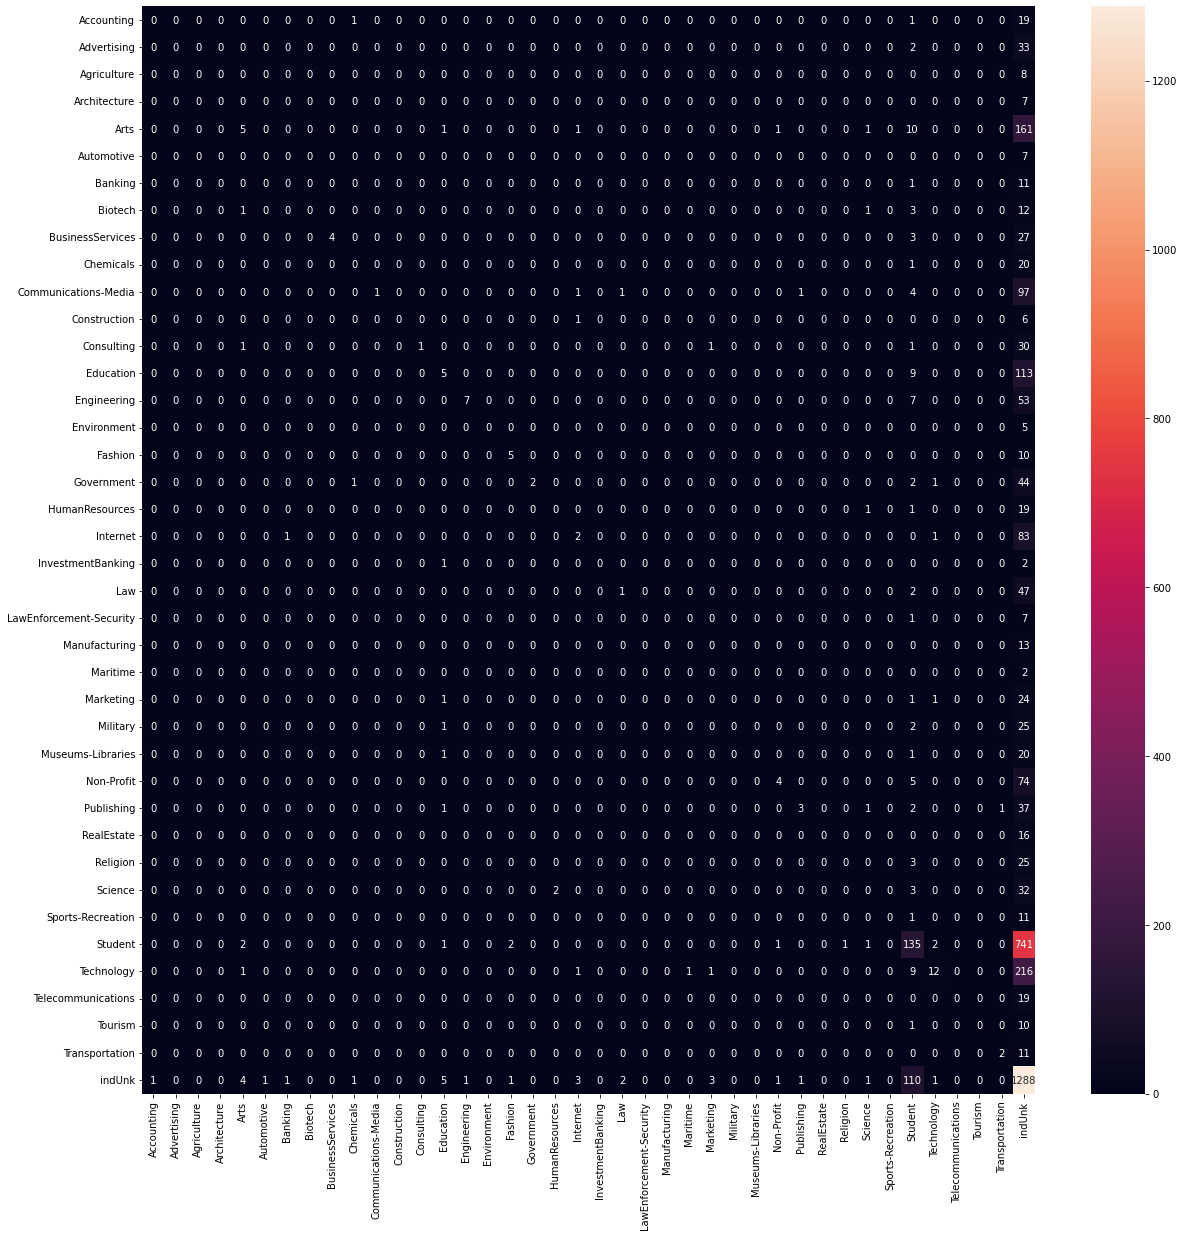

In [103]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred_linearsvc, labels=enc_labels.classes_)

df_cm = pd.DataFrame(cm, index = [i for i in enc_labels.classes_], columns = [i for i in enc_labels.classes_])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True,fmt='g')

In [104]:
# Label encoding for y
enc_labels = preprocessing.LabelEncoder()
y_en = enc_labels.fit(y)

print(enc_labels.classes_)

['Accounting' 'Advertising' 'Agriculture' 'Architecture' 'Arts'
 'Automotive' 'Banking' 'Biotech' 'BusinessServices' 'Chemicals'
 'Communications-Media' 'Construction' 'Consulting' 'Education'
 'Engineering' 'Environment' 'Fashion' 'Government' 'HumanResources'
 'Internet' 'InvestmentBanking' 'Law' 'LawEnforcement-Security'
 'Manufacturing' 'Maritime' 'Marketing' 'Military' 'Museums-Libraries'
 'Non-Profit' 'Publishing' 'RealEstate' 'Religion' 'Science'
 'Sports-Recreation' 'Student' 'Technology' 'Telecommunications' 'Tourism'
 'Transportation' 'indUnk']


In [105]:
y_train_en=enc_labels.transform(y_train)
y_train_en

array([39, 39, 39, ..., 34, 13, 34])

In [106]:
y_test_en=enc_labels.transform(y_test)
y_test_en

array([34, 39, 39, ..., 39, 14, 34])

In [107]:
y_pred_linearsvc_en=enc_labels.transform(y_pred_linearsvc)
y_pred_linearsvc

array(['Science', 'indUnk', 'indUnk', ..., 'indUnk', 'indUnk', 'indUnk'],
      dtype='<U23')

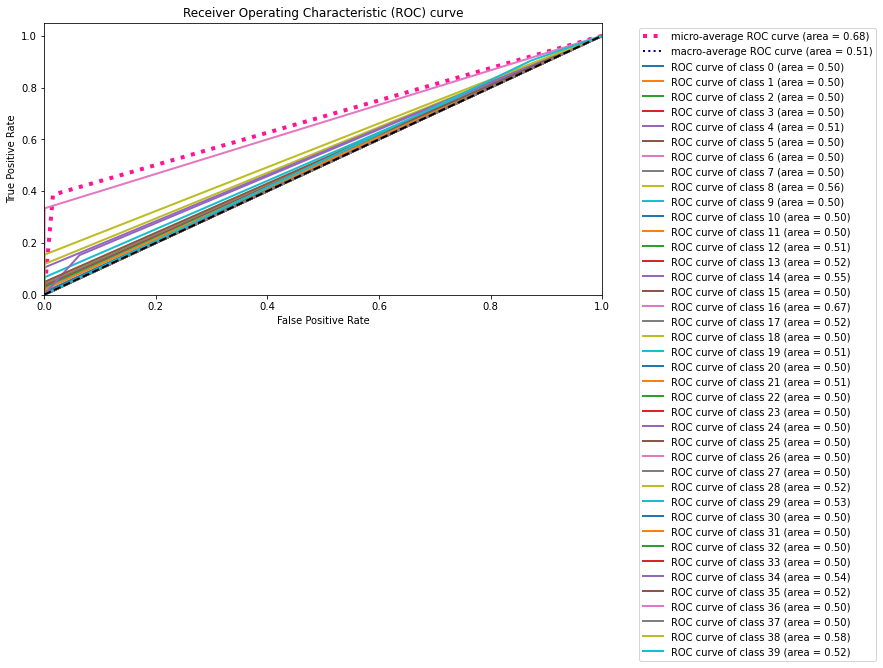

In [108]:
plot_roc_curve(y_test_en, y_pred_linearsvc_en)

In [109]:
n_classes = len(np.unique(y_test))
y_test_ = label_binarize(y_test_en, classes=np.arange(n_classes))
y_pred_ = label_binarize(y_pred_linearsvc_en, classes=np.arange(n_classes))
print_evaluation_metrics(y_test_,y_pred_,'micro')

Accuracy score          - micro : 0.3857404021937843
F1 score                - micro : 0.3857404021937843
Average precision score - micro : 0.16415214782977788
Average recall score    - micro : 0.3857404021937843


In [110]:
print_evaluation_metrics(y_test_,y_pred_,'macro')

Accuracy score          - macro : 0.3857404021937843
F1 score                - macro : 0.062385075464955676
Average precision score - macro : 0.04383753691648834
Average recall score    - macro : 0.05298144788981206


In [111]:
print_evaluation_metrics(y_test_,y_pred_,'weighted')

Accuracy score          - weighted : 0.3857404021937843
F1 score                - weighted : 0.27611513888143857
Average precision score - weighted : 0.22070791383996313
Average recall score    - weighted : 0.3857404021937843


#### Insights of evaluation metrics:
**Precision**                      : Out of all predicted values, what fraction are predicted correctly.
<br>**Recall(sensitivity or TPR)** : Out of all actual values how much fraction we identified correctly.
<br>**Micro-averaged F1 score**    : Computed as global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP).
<br>**Macro-averaged F1 score**    : Computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.
<br>**Weighted-averaged F1 score** : Calculated by taking the mean of all per-class F1 scores while considering each class’s support/weightage.

Since the distribution of data across Topics is not consistent/equal, and considering the weighted average F1 score will be appropriate.  Macro-averaging score will not help here as well as it does not consider the support each class provides for the model. In this multi-class classification problem, each class depending on its population/weightage contributes to model accuracy score.
- Weighted Average F1 score is 27.61% where as the overall Average score is 38.57%. Though the population taken for this model is small and the distribution is not equal for all topics, the model has not over-fitted in training dataset. It has almost similar scores in both training and test dataset. 
- Overall Accuracy score for training dataset is 46.43% and the model has accuracy score of 38.57% percent in test dataset.
- This model when applied on full volume of data it will consistently produce better predictions.

## 5. Share insights on relative performance comparison [8 Marks]
### A. Which vectorizer performed better? Probable reason?. 
[2 Marks]

- TF-IDF vectorizer has performed better than Count Vectorizer, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 
- Since we have big sentences, identifying the importance of the words and removing the words that are less important is key for more accurate predictions. TF-IDF vectorizer does this job perfectly.
- Also this capability of TF-IDF vectorizer makes it easy for analysis and hence making the model building less complex by reducing the input dimensions.
- On top it, chi2 feature selection also helped in identifying the top most important features and making the model perform accurately.

### B. Which model outperformed? Probable reason? [2 Marks]

#### Insights:

- Since we picked only 20,000 records due to memeory error, models couldnt achieve optimized performance. 
- Also the data is unequally distributed - i.e - 'IndUnk' topic has the highest count and covers 36.8% of the population and 'Student' topic has the second highest count and covers 22.6% of the population of all topics.Around 30 classes cover less than 1% of the population.
Because of the above mentioned data concerns, supervised learning models may not give optimal (above 95%) test accuracy score.

This is illustrated below.

In [112]:
cnts=blogtext_df['topic'].value_counts()
cnts_df = pd.DataFrame(cnts)
cnts_df = cnts_df.reset_index()
cnts_df.columns = ['topic', 'topic_cnt']
df_len=len(blogtext_df['topic'])
cnts_df['perc']=(cnts_df['topic_cnt']/df_len)*100
cnts_df.columns = ['topic', 'topic_cnt', 'topic_perc']
cnts_df.head(50)

,topic,topic_cnt,topic_perc
0,indUnk,251015,36.844400
1,Student,153903,22.590139
2,Technology,42055,6.172903
3,Arts,32449,4.762918
4,Education,29633,4.349581
5,Communications-Media,20140,2.956183
6,Internet,16006,2.349387
7,Non-Profit,14700,2.157690
8,Engineering,11653,1.710447
9,Law,9040,1.326906


#### **Models performance summary**:
- Logistic regression model had 98.87% accuracy score in training dataset but had 37.34% accuracy score in test data. So the model overfitted in the training dataset.
- SVM model with 'rbf' kernel with gamma=2.0 and c=7 the model gave better performance of all models with accuracy of 55.83% in train dataset and 38.62% in test dataset.
- LinearSVC too performed well for the given dataset and volume of data selected.The accuracy scores were similar in training and test datasets. Overall Accuracy score for training dataset is 46.43% and the model has accuracy score of 38.57% percent in test dataset.
- Both SVC models are good. However, LinearSVC model - since the training score and test score are closer, when applied on full volume of data it will consistently produce better predictions.

### C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]

- Applied TfidfVectorizer and selected only 7000 features which had highest scores. 
- TF-IDF vectorizer and feature selection is a key step for improving model performance.
- SVM model with 'rbf' kernel with gamma=2.0 and c=7 the model gave better performance of all models with accuracy of 55.83% in train dataset and 38.62% in test dataset.
- Hyper parameter tuning for best LinearSVC model was identified as C=1, penalty='l1', dual=False, loss='squared_hinge'. 
- The model has right balance between train dataset and test dataset with accuracy of 46.43% in training dataset and 38.57% percent in test dataset respectively.

### D. According to you, which performance metric should be given most importance, why?. [2 Marks]

#### Insights of evaluation metrics:
**Precision**                      : Out of all predicted values, what fraction are predicted correctly.
<br>**Recall(sensitivity or TPR)** : Out of all actual values how much fraction we identified correctly.
<br>**Micro-averaged F1 score**    : Computed as global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP).
<br>**Macro-averaged F1 score**    : Computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.
<br>**Weighted-averaged F1 score** : Calculated by taking the mean of all per-class F1 scores while considering each class’s support/weightage.

In this multi-class classification problem, each class depending on its population/weightage contributes to model accuracy score. Since the distribution of data across Topics is not consistent/equal, and considering the **weighted average F1 score** will be appropriate for this case. 

Macro average gives each prediction similar weight while calculating loss but in this case since data is imbalanced and we want to give importance to some prediction more (based on their proportion). So, Macro-averaging score will not help here. 

- Weighted Average F1 score is 27.61% where as the overall Average score is 38.57%. Though the population taken for this model is small and the distribution is not equal for all topics, the model has not over-fitted in training dataset. It has almost similar scores in both training and test dataset. 
- Overall Accuracy score for training dataset is 46.43% and the model has accuracy score of 38.57% percent in test dataset.
- This model when applied on full volume of data it will consistently produce better predictions.

# PART B 
## • PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:
## 1. Start chat session with greetings and ask what the user is looking for. [5 Marks]

In [113]:
# Load the GL_Bot json file
with open('GL_Bot.json') as file:
    corpus=json.load(file)

In [114]:
print(corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [115]:
# Start a simple chat bot which will only greet and ask what the user is looking for
def glbot_greet_chat():
    print("Chat with GL-BOT (type: stop to quit)")
    print("if answer is not right (type: *)")
    while True:
        inp=input("\n\nYou:")
        if inp.lower()=="*":
            print("GL-BOT: Please rephrase your question and try again")
        elif inp.lower()=="quit":
            break
        else:    
            for tg in corpus["intents"]:
                if tg["tag"] =="Intro":
                    responses=tg['responses']

            print(random.choice(responses))  

In [116]:
glbot_greet_chat()

Chat with GL-BOT (type: stop to quit)
if answer is not right (type: *)


You:hi
Hello! how can i help you ?


You:how are you?
Hello! how can i help you ?


You:quit


## 2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]

#### Data pre-processing steps

In [117]:
### Tokenization
W=[]
L=[]
doc_x=[]
doc_y=[]

for intent in corpus['intents']:
    for pattern in intent['patterns']:
        w_temp=nltk.word_tokenize(pattern)
        W.extend(w_temp)
        doc_x.append(w_temp)
        doc_y.append(intent["tag"])
        
    # Add missing tag
    if intent["tag"] not in L:
        L.append(intent["tag"])

In [118]:
print("W     : {}".format(W))
print("L     : {}".format(L))
print("doc_x : {}".format(doc_x))
print("doc_x len : {}".format(len(doc_x)))
print("doc_y : {}".format(doc_y))
print("doc_y len : {}".format(len(doc_y)))

W     : ['hi', 'how', 'are', 'you', 'is', 'anyone', 'there', 'hello', 'whats', 'up', 'hey', 'yo', 'listen', 'please', 'help', 'me', 'i', 'am', 'learner', 'from', 'i', 'belong', 'to', 'aiml', 'batch', 'aifl', 'batch', 'i', 'am', 'from', 'my', 'pm', 'is', 'blended', 'online', 'i', 'am', 'from', 'hey', 'ya', 'talking', 'to', 'you', 'for', 'first', 'time', 'thank', 'you', 'thanks', 'cya', 'see', 'you', 'later', 'see', 'you', 'later', 'goodbye', 'i', 'am', 'leaving', 'have', 'a', 'Good', 'day', 'you', 'helped', 'me', 'thanks', 'a', 'lot', 'thanks', 'a', 'ton', 'you', 'are', 'the', 'best', 'great', 'help', 'too', 'good', 'you', 'are', 'a', 'good', 'learning', 'buddy', 'olympus', 'explain', 'me', 'how', 'olympus', 'works', 'I', 'am', 'not', 'able', 'to', 'understand', 'olympus', 'olympus', 'window', 'not', 'working', 'no', 'access', 'to', 'olympus', 'unable', 'to', 'see', 'link', 'in', 'olympus', 'no', 'link', 'visible', 'on', 'olympus', 'whom', 'to', 'contact', 'for', 'olympus', 'lot', 'of',

In [119]:
### convert to lower case and stemming
stemmer = PorterStemmer()
W=[stemmer.stem(w.lower()) for w in W if w != '?']
W=sorted(list(set(W)))
L=sorted(L)

In [120]:
### Prepare Bag of words for the given corpus and prepare train dataset and target
train=[]
target=[]
out_empty=[0 for _ in range(len(L))]

for x, doc in enumerate(doc_x):
    bag=[]
    w_temp=[stemmer.stem(w.lower()) for w in doc]
    
    for w in W:
        if w in w_temp:
            bag.append(1)
        else:
            bag.append(0)
            
    output_row=out_empty[:]
    output_row[L.index(doc_y[x])]=1
    
    train.append(bag)
    target.append(output_row)
    

In [121]:
print("doc_x :",doc_x[1])
print("train :",train[1])
print("doc_y :",doc_y[1])
print("target :",target[1])

doc_x : ['how', 'are', 'you']
train : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
doc_y : Intro
target : [0, 0, 1, 0, 0, 0, 0, 0]


In [122]:
# convert train and target to arrays to feed to NN model
train_arr=np.array(train)
print(train_arr.shape[1])
target_arr=np.array(target)
print(target_arr.shape[1])

154
8


In [123]:
## Build a model to predict the responses
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
bot_model=Sequential()

bot_model.add(Dense(64,input_dim=train_arr.shape[1],activation='relu'))
bot_model.add(Dropout(0.5))
bot_model.add(Dense(32,activation='relu'))
bot_model.add(Dropout(0.5))
bot_model.add(Dense(8,activation='softmax'))

In [126]:
lr=0.01
batch_size=200
EPOCH=200
bot_model.compile(loss='mean_absolute_error', metrics=['accuracy'])
nlp_model = bot_model.fit(train_arr, target_arr, epochs=EPOCH, verbose = 1)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9688
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9531
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9453
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9922
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9609
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 0.9531
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.9219
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0174 - accuracy: 0.9609
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.9688
Epoch 10/200
4/4 [==============================] - 0s 373us/step - loss: 0.0193 - accuracy: 0.9531
Epoch 11/200
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9766
Epoch 85/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9844
Epoch 86/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9766
Epoch 87/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9609
Epoch 88/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9844
Epoch 89/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9766
Epoch 90/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9531
Epoch 91/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9609
Epoch 92/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9766
Epoch 93/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9531
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9688
Epoch 168/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9844
Epoch 169/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9688
Epoch 170/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9766
Epoch 171/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9844
Epoch 172/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9766
Epoch 173/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9531
Epoch 174/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9766
Epoch 175/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9688
Epoch 176/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 177/200
4/4 [=====

#### The model has achieved an max accuracy score of 99.22%

In [127]:
### define a function to prepare bag of words for the input supplied by the user 
def bag_of_words(inp,W):
    bow=[]

    inp_tkn=nltk.word_tokenize(inp)
    bag=[]
    inp_tkn_stem=[stemmer.stem(w.lower()) for w in inp_tkn]
    
    for w in W:
        if w in inp_tkn_stem:
            bag.append(1)
        else:
            bag.append(0)
            
    bow.append(bag)
    bow_arr=np.array(bow)
    
    return bow_arr

In [128]:
## Testing the above function by providing random text
inp="how are you"
bag_of_words(inp,W)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [129]:
### Define the chat bot
def glbot_chat():
    print("Chat with GL-BOT (type: stop to quit)")
    print("if answer is not right (type: *)")
    while True:
        inp=input("\n\nYou:")
        if re.match(r'^[_\W]+$', inp.lower()):
            print("GL-BOT: Please rephrase your question and try again")
        elif inp.lower()=="quit":
            break
        else:    
            result=bot_model.predict(bag_of_words(inp,W),verbose=0)
            result_index=np.argmax(result)
            tag=L[result_index]

            for tg in corpus["intents"]:
                if tg["tag"] ==tag:
                    responses=tg['responses']

            print(random.choice(responses))   


In [130]:
### Executing the chat bot
glbot_chat()    

Chat with GL-BOT (type: stop to quit)
if answer is not right (type: *)


You:Hi
Hello! how can i help you ?


You:how are you? this is srileka
Hello! how can i help you ?


You:who are you?
I am your virtual learning assistant


You:I would to understand about supervised learning
Link: Machine Learning wiki 


You:and what is deep learning?
Link: Neural Nets wiki


You:I am unable to see link in olympus
Link: Olympus wiki


You:the links did not help much. looking for more info.
Tarnsferring the request to your PM


You:thank you!
I hope I was able to assist you, Good Bye


You:quit


### 3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]
Hint: There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might require you to experiment, research, self learn and implement the above classifier. There might be many iterations between hand building the corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance i.e. ability to answer right questions also increases

In [131]:
### Executing the chat bot for various questions and end it only when user asks.
### trying different questions 
glbot_chat() 

Chat with GL-BOT (type: stop to quit)
if answer is not right (type: *)


You:hi, how are you?
Hello! how can i help you ?


You:how to use olympus?
Link: Olympus wiki


You:can you explain me how machine learning works?
Link: Machine Learning wiki 


You:??
GL-BOT: Please rephrase your question and try again


You:%^&((&%#
GL-BOT: Please rephrase your question and try again


You:what is softmax??
Link: Neural Nets wiki


You:you did not help me.. links did not work
Tarnsferring the request to your PM


You:you are stupid
Please use respectful words


You::-)
GL-BOT: Please rephrase your question and try again


You:??
GL-BOT: Please rephrase your question and try again


You:goodbye
I hope I was able to assist you, Good Bye


You:quit


#### As we can see above, even after trying various queries the bot was on loop to provide responses. Even if we give special characters it was trying to provide a valid response. It ended only when we give quit command.

# THE END